In [0]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 

In [0]:
ewa = pd.read_csv("EastWestAirlinesCluster.csv")
ewa.iloc[:,[1,6,7,8,9,10]].head()


,Balance,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,174,1,0,0,7000
1,19244,215,2,0,0,6968
2,41354,4123,4,0,0,7034
3,14776,500,1,0,0,6952
4,97752,43300,26,2077,4,6935


In [0]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max() - i.min())
    return (x)



# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(ewa.iloc[:,[1,6,7,8,9,10]])
df_norm

,Balance,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.164211,0.302326,0.067398,0.075472,0.835905
...,...,...,...,...,...,...
3994,0.010837,0.032330,0.046512,0.006490,0.018868,0.168917
3995,0.037766,0.003720,0.058140,0.000000,0.000000,0.167953
3996,0.043169,0.096505,0.093023,0.000000,0.000000,0.168797
3997,0.032202,0.001896,0.011628,0.016225,0.018868,0.168676


In [0]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 

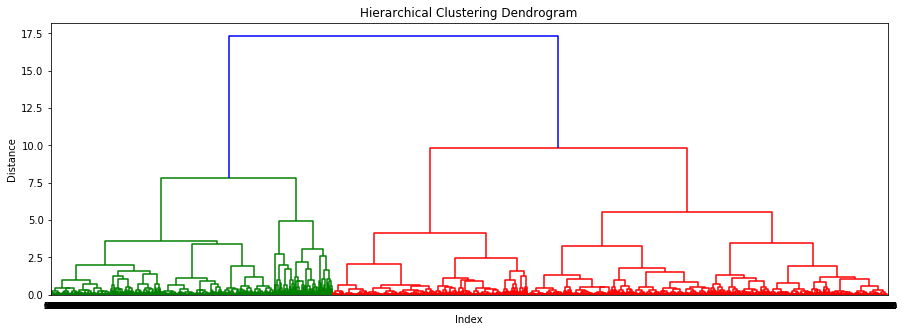

In [0]:
# Dendogram: Ward Linkage
z = linkage(df_norm, method="ward", metric="euclidean")

plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

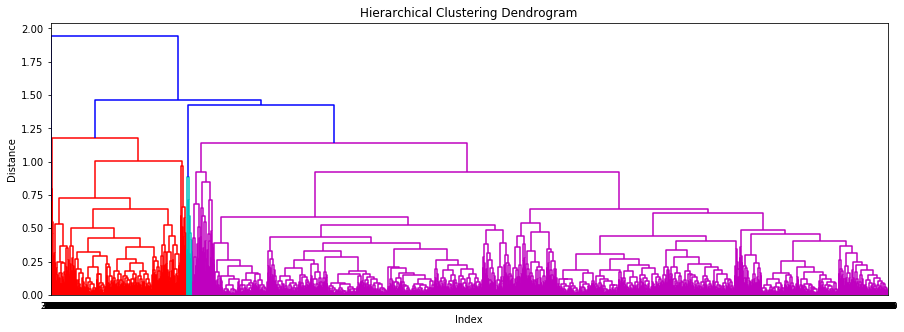

In [0]:
# Dendogram: Complete Linkage
z = linkage(df_norm, method="complete", metric="euclidean")

plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [0]:
# Now applying AgglomerativeClustering choosing 2 as clusters from the dendrogram
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=2, linkage='complete', affinity = "euclidean").fit(df_norm) 
h_ward = AgglomerativeClustering(n_clusters=2, linkage='ward', affinity = "euclidean").fit(df_norm) 

cluster_labels_h=pd.Series(h_complete.labels_)
cluster_labels_ward=pd.Series(h_ward.labels_)

ewa['clust_complete']=cluster_labels_h
ewa['clust_ward']=cluster_labels_ward

ewa.iloc[:,[1,6,7,8,9,10]].groupby(ewa.clust_ward).mean()

,Balance,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
clust_ward,,,,,,
0,54507.479638,12365.509804,9.901584,242.050905,0.694947,3005.359351
1,111193.669636,26554.497402,14.949517,889.268003,2.709725,6310.249443


In [0]:
ewa.iloc[:,[1,6,7,8,9,10]].groupby(ewa.clust_complete).mean()

,Balance,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
clust_complete,,,,,,
0,73542.85632,17096.29612,11.54418,440.531414,1.325657,4120.4801
1,131999.50000,65634.25000,69.25000,19960.000000,49.250000,2200.2500
